## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

%matplotlib inline

pd.set_option('display.max_columns', None)

### Data Loading


In [2]:
df = pd.read_csv('regression_data_clean.csv')
print(df.shape)

(21597, 21)


In [3]:
df.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,10/13/14,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,12/9/14,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2/25/15,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,12/9/14,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2/18/15,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


### Change effective to date column to datetime format.

In [4]:
df['date']=pd.to_datetime(df['date'])

### Drop duplicates

In [5]:
df=df.sort_values('date').drop_duplicates('id',keep='last').reset_index()

### Check NaN values per column.

In [6]:
nulls = pd.DataFrame(df.isna().sum()/len(df))
nulls= nulls.reset_index()
nulls.columns = ['column_name', 'Percentage Null Values']
nulls.sort_values(by='Percentage Null Values', ascending = False)

,column_name,Percentage Null Values
0,index,0.0
1,id,0.0
20,sqft_lot15,0.0
19,sqft_living15,0.0
18,long,0.0
17,lat,0.0
16,zipcode,0.0
15,yr_renovated,0.0
14,yr_built,0.0
13,sqft_basement,0.0


## checking the number of unique values

In [7]:
df['zipcode'].value_counts()

98103    600
98038    586
98115    576
98052    571
98117    548
        ... 
98102    104
98010     99
98024     79
98148     56
98039     49
Name: zipcode, Length: 70, dtype: int64

In [8]:
df['yr_renovated'].value_counts()

0       20510
2014       91
2013       37
2003       36
2000       35
        ...  
1944        1
1959        1
1951        1
1948        1
1934        1
Name: yr_renovated, Length: 70, dtype: int64

In [9]:
df['yr_built'].value_counts()

2014    559
2006    453
2005    450
2004    429
2003    420
       ... 
1901     29
1933     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

In [10]:
df['grade'].value_counts()

7     8889
8     6041
9     2606
6     1995
10    1130
11     396
5      234
12      88
4       27
13      13
3        1
Name: grade, dtype: int64

In [11]:
df['condition'].value_counts()

3    13900
4     5643
5     1687
2      162
1       28
Name: condition, dtype: int64

In [12]:
df['view'].value_counts()

0    19306
2      960
3      507
1      331
4      316
Name: view, dtype: int64

In [13]:
df['waterfront'].value_counts()

0    21257
1      163
Name: waterfront, dtype: int64

In [14]:
df['floors'].value_counts()

1.0    10552
2.0     8203
1.5     1888
3.0      609
2.5      161
3.5        7
Name: floors, dtype: int64

In [11]:
df['bathrooms'].value_counts()

2.50    5352
1.00    3794
1.75    3020
2.25    2031
2.00    1913
1.50    1429
2.75    1182
3.00     747
3.50     729
3.25     586
3.75     155
4.00     134
4.50      99
4.25      79
0.75      70
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [12]:
df['bedrooms'].value_counts()

3     9731
4     6849
2     2736
5     1586
6      265
1      191
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [13]:
df['sqft_basement'].value_counts()

0       12999
600       220
700       215
500       211
800       206
        ...  
1816        1
792         1
2590        1
935         1
248         1
Name: sqft_basement, Length: 306, dtype: int64

In [14]:
df['zipcode'] = df['zipcode'].astype('object') 

In [15]:
df1= df.copy()

In [16]:
# dropping the outliers
df1=df1[df1['bedrooms']!=33]

In [17]:
df1.reset_index()
df1.head()

,index,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7316,2202500290,2014-05-02,4,1.0,1450,8800,1.0,0,0,4,7,1450,0,1954,0,98006,47.5746,-122.135,1260,8942,435000
1,20586,7853361370,2014-05-02,4,2.5,3310,6500,2.0,0,0,3,8,3310,0,2012,0,98065,47.5150,-121.870,2380,5000,555000
2,1040,7197300105,2014-05-02,4,2.5,1940,10500,1.0,0,0,4,7,1140,800,1976,0,98052,47.6830,-122.114,2200,10500,550000
3,20543,3438501320,2014-05-02,2,2.5,1630,1368,2.0,0,0,3,7,1280,350,2009,0,98106,47.5489,-122.363,1590,2306,295000
4,9587,472000620,2014-05-02,3,2.5,2600,4750,1.0,0,0,4,9,1700,900,1951,0,98117,47.6833,-122.400,2380,4750,790000


In [235]:
# select numericals
num=df1.select_dtypes('number')
num.drop(columns=['id','index'],inplace=True)

### Data description

In [19]:
num.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,price
count,21419.000000,21419.000000,21419.000000,2.141900e+04,21419.000000,21419.000000,21419.000000,21419.00000,21419.000000,21419.000000,21419.000000,21419.000000,21419.000000,21419.000000,21419.000000,21419.000000,21419.000000,2.141900e+04
mean,3.372566,2.118446,2083.154256,1.512846e+04,1.496008,0.007610,0.235118,3.41071,7.662823,1791.205285,291.948971,1971.094122,84.797049,47.560191,-122.213778,1988.414819,12776.095196,5.418568e+05
std,0.903013,0.768734,918.824411,4.153172e+04,0.540083,0.086905,0.767182,0.64996,1.171990,828.696414,442.881467,29.387365,402.583607,0.138590,0.140792,685.538299,27346.204562,3.675649e+05
min,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.00000,3.000000,370.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000,7.800000e+04
25%,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.00000,7.000000,1200.000000,0.000000,1952.000000,0.000000,47.471200,-122.328000,1490.000000,5100.000000,3.249500e+05
50%,3.000000,2.250000,1920.000000,7.614000e+03,1.500000,0.000000,0.000000,3.00000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.572100,-122.230000,1840.000000,7620.000000,4.505000e+05
75%,4.000000,2.500000,2550.000000,1.069200e+04,2.000000,0.000000,0.000000,4.00000,8.000000,2220.000000,560.000000,1997.000000,0.000000,47.678050,-122.125000,2370.000000,10086.500000,6.450000e+05
max,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.00000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06


### Correlation Analysis


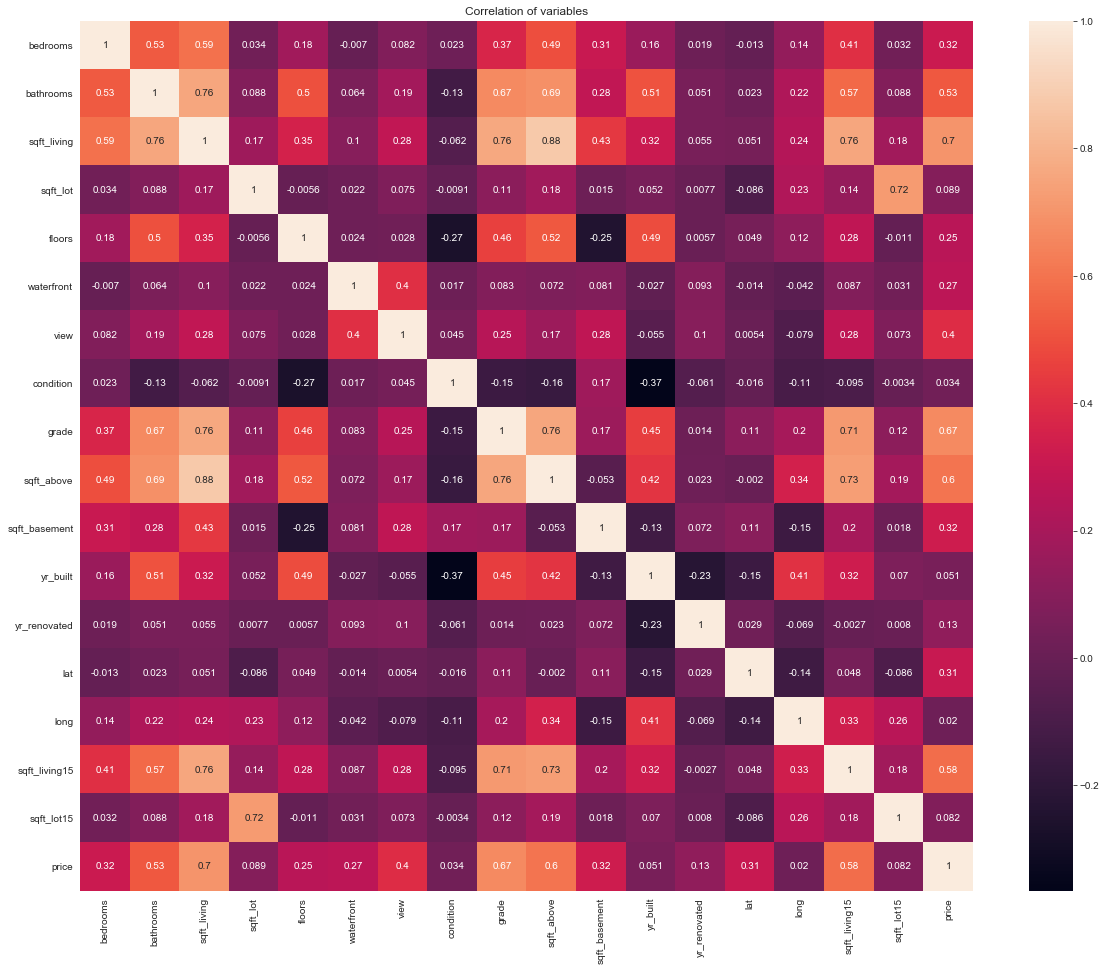

In [40]:
plt.figure(figsize=(20,16))
plt.title('Correlation of variables')
sns.heatmap(num.corr(),vmax=1.0,  annot=True)
plt.show()

### Data Visualizations: 

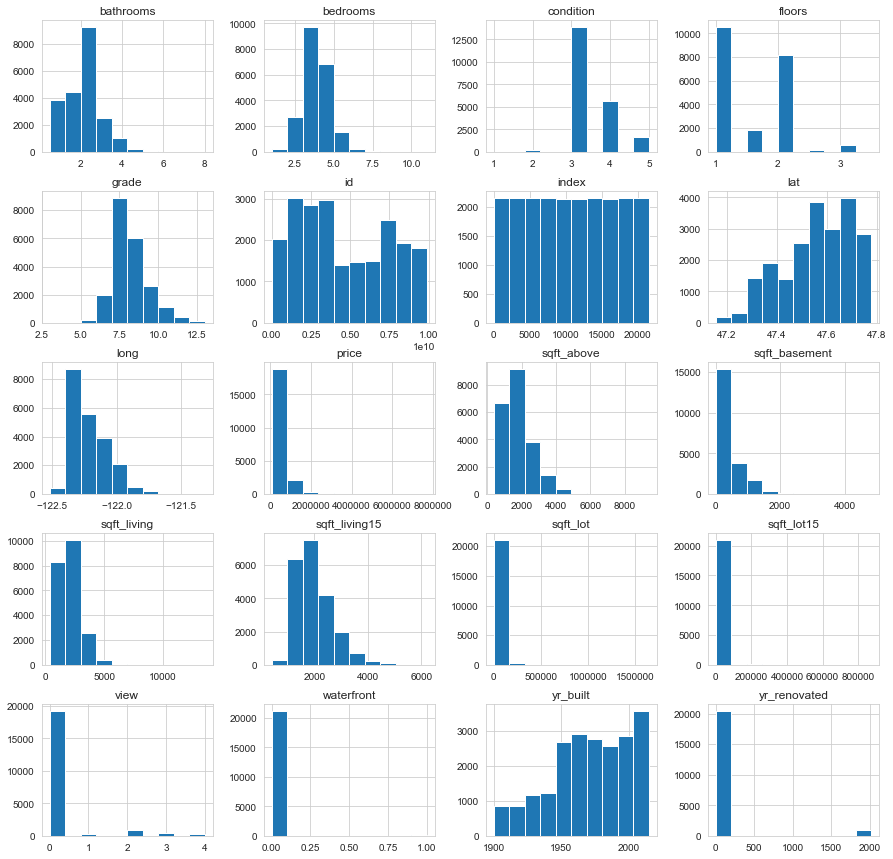

In [420]:
df1.hist(figsize=[15,15]);

#### Box-Plot

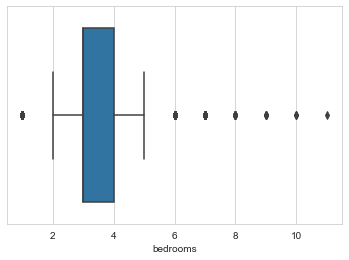

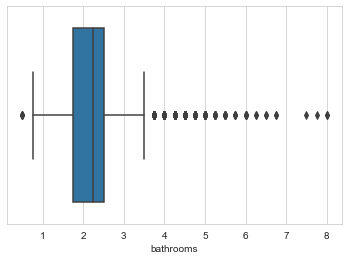

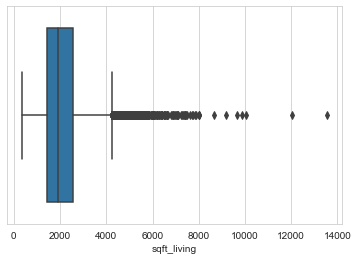

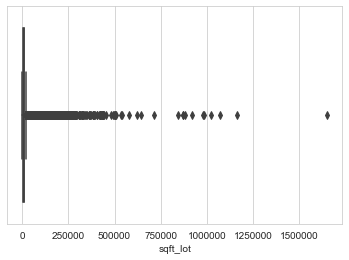

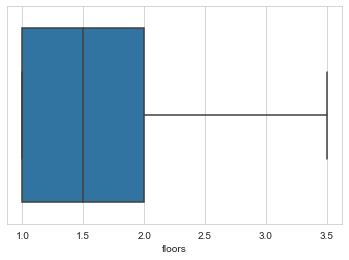

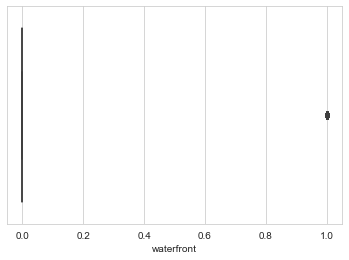

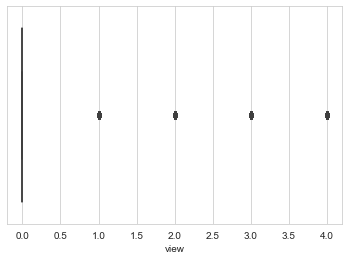

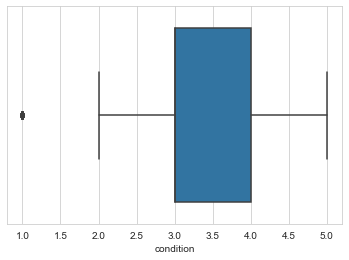

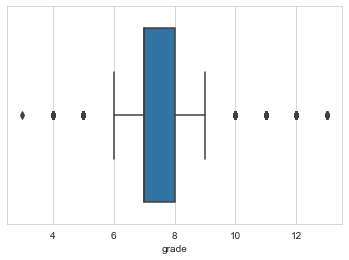

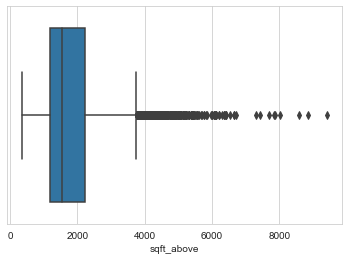

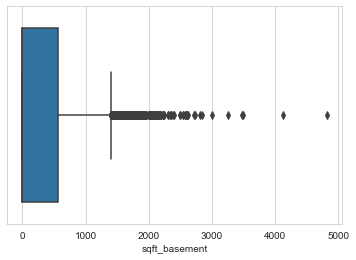

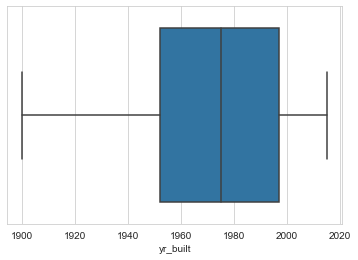

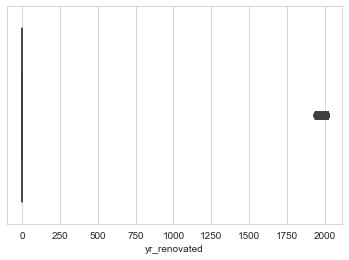

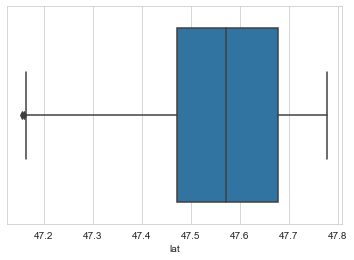

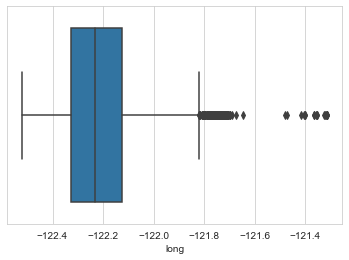

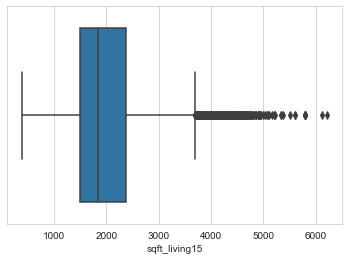

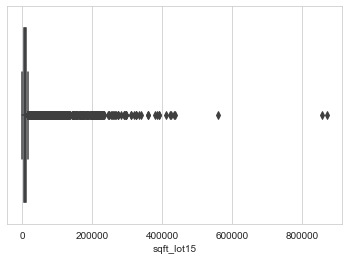

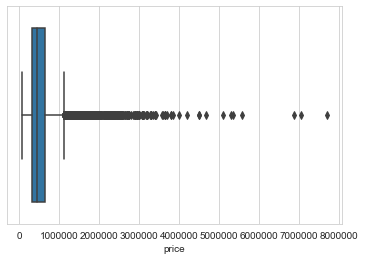

In [41]:
for col in list(num.columns):
        sns.boxplot(num[col])
        plt.show()


### X-Y

In [236]:
y=df1['price']
X=num
X.drop(columns='price',inplace=True)
#X.drop(columns=['zipcode'],inplace=True)
#X.drop(columns=['sqft_above'],inplace=True)

X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,4,1.00,1450,8800,1.0,0,0,4,7,1450,0,1954,0,47.5746,-122.135,1260,8942
1,4,2.50,3310,6500,2.0,0,0,3,8,3310,0,2012,0,47.5150,-121.870,2380,5000
2,4,2.50,1940,10500,1.0,0,0,4,7,1140,800,1976,0,47.6830,-122.114,2200,10500
3,2,2.50,1630,1368,2.0,0,0,3,7,1280,350,2009,0,47.5489,-122.363,1590,2306
4,3,2.50,2600,4750,1.0,0,0,4,9,1700,900,1951,0,47.6833,-122.400,2380,4750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21415,4,1.75,1980,5850,1.0,0,1,4,8,1380,600,1960,0,47.5607,-122.391,1810,5850
21416,3,2.00,1410,44866,1.0,0,0,4,7,1410,0,1985,0,47.3273,-122.370,2950,29152
21417,5,2.00,1870,7344,1.5,0,0,3,7,1870,0,1960,0,47.5951,-122.144,1870,7650
21418,2,1.75,1390,6670,1.0,0,0,3,6,720,670,1941,0,47.6914,-122.308,920,6380


## Model

In [237]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [252]:
# linear regression
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statistics 

def m_func(X_train, X_test, y_train, y_tes):
    relative_error = []
    lm = linear_model.LinearRegression()
    lm_model = lm.fit(X_train,y_train)
    lm_predictions = lm_model.predict(X_test)
    MAE = mean_absolute_error(y_test,lm_predictions)
    MSE = mean_squared_error(y_test,lm_predictions)
    RMSE = np.sqrt(MSE)
    R2 = r2_score(y_test,lm_predictions)
    adj_r2 = 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
    rel_error=np.mean(np.abs((y_test - lm_predictions) / y_test))
    print("MAE: %6.2f" % (MAE))
    print("MSE: %6.2f" % (MSE))
    print("RMSE: %6.2f" % (RMSE))
    print("R2: %4.2f" % (R2))
    print("Adjusted R2: %4.2f" % (adj_r2))
    print("Relative error: %4.2f" % (rel_error))

        

In [253]:
linear1=m_func(X_train, X_test, y_train, y_test)

MAE: 114571.63
MSE: 33457029295.97
RMSE: 182912.63
R2: 0.75
Adjusted R2: 0.75
Relative error: 0.23


In [240]:
df2=df1.copy()
df2.head()

,index,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7316,2202500290,2014-05-02,4,1.0,1450,8800,1.0,0,0,4,7,1450,0,1954,0,98006,47.5746,-122.135,1260,8942,435000
1,20586,7853361370,2014-05-02,4,2.5,3310,6500,2.0,0,0,3,8,3310,0,2012,0,98065,47.5150,-121.870,2380,5000,555000
2,1040,7197300105,2014-05-02,4,2.5,1940,10500,1.0,0,0,4,7,1140,800,1976,0,98052,47.6830,-122.114,2200,10500,550000
3,20543,3438501320,2014-05-02,2,2.5,1630,1368,2.0,0,0,3,7,1280,350,2009,0,98106,47.5489,-122.363,1590,2306,295000
4,9587,472000620,2014-05-02,3,2.5,2600,4750,1.0,0,0,4,9,1700,900,1951,0,98117,47.6833,-122.400,2380,4750,790000


In [241]:
df2.drop(columns=['index','id','date'],inplace=True)

# Model Improvement

## Test 1
### zipcode to city name

### getting  city names from zipcodes 

In [242]:
from uszipcode import Zipcode,SearchEngine


In [243]:
def city_name(x):
    search = SearchEngine(simple_zipcode=True)
    zipcode=search.by_zipcode(x)
    return zipcode.major_city
    


In [244]:
df2['city'] = list(map(city_name, df2["zipcode"]))

In [245]:
df2['city'].unique()

array(['Bellevue', 'Snoqualmie', 'Redmond', 'Seattle', 'Issaquah',
       'Auburn', 'Sammamish', 'Carnation', 'Fall City', 'Woodinville',
       'North Bend', 'Federal Way', 'Kent', 'Renton', 'Kirkland',
       'Bothell', 'Maple Valley', 'Duvall', 'Kenmore', 'Mercer Island',
       'Black Diamond', 'Enumclaw', 'Vashon', 'Medina'], dtype=object)

In [246]:
df2['city'].value_counts()

Seattle          8884
Renton           1580
Bellevue         1395
Kent             1193
Kirkland          974
Redmond           971
Auburn            906
Sammamish         793
Federal Way       768
Issaquah          731
Maple Valley      586
Woodinville       468
Snoqualmie        305
Kenmore           282
Mercer Island     282
Enumclaw          233
North Bend        218
Bothell           194
Duvall            190
Carnation         123
Vashon            116
Black Diamond      99
Fall City          79
Medina             49
Name: city, dtype: int64

In [427]:
# get dummies of zipcode

cat=df2['city']
categorical = pd.get_dummies(df2[['city','zipcode']], columns=list(df2.select_dtypes('object').columns),drop_first=True)
categorical.head()


,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,city_Bellevue,city_Black Diamond,city_Bothell,city_Carnation,city_Duvall,city_Enumclaw,city_Fall City,city_Federal Way,city_Issaquah,city_Kenmore,city_Kent,city_Kirkland,city_Maple Valley,city_Medina,city_Mercer Island,city_North Bend,city_Redmond,city_Renton,city_Sammamish,city_Seattle,city_Snoqualmie,city_Vashon,city_Woodinville
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [428]:
y=df2['price']

X=pd.concat([num,categorical],axis=1)
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,city_Bellevue,city_Black Diamond,city_Bothell,city_Carnation,city_Duvall,city_Enumclaw,city_Fall City,city_Federal Way,city_Issaquah,city_Kenmore,city_Kent,city_Kirkland,city_Maple Valley,city_Medina,city_Mercer Island,city_North Bend,city_Redmond,city_Renton,city_Sammamish,city_Seattle,city_Snoqualmie,city_Vashon,city_Woodinville
0,4,1.00,1450,8800,1.0,0,0,4,7,1450,0,1954,0,47.5746,-122.135,1260,8942,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4,2.50,3310,6500,2.0,0,0,3,8,3310,0,2012,0,47.5150,-121.870,2380,5000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,4,2.50,1940,10500,1.0,0,0,4,7,1140,800,1976,0,47.6830,-122.114,2200,10500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,2,2.50,1630,1368,2.0,0,0,3,7,1280,350,2009,0,47.5489,-122.363,1590,2306,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,3,2.50,2600,4750,1.0,0,0,4,9,1700,900,1951,0,47.6833,-122.400,2380,4750,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21415,4,1.75,1980,5850,1.0,0,1,4,8,1380,600,1960,0,47.5607,-122.391,1810,5850,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
21416,3,2.00,1410,44866,1.0,0,0,4,7,1410,0,1985,0,47.3273,-122.370,2950,29152,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21417,5,2.00,1870,7344,1.5,0,0,3,7,1870,0,1960,0,47.5951,-122.144,1870,7650,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21418,2,1.75,1390,6670,1.0,0

In [429]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [430]:
linear2=m_func(X_train, X_test, y_train, y_test)

MAE: 95876.62
MSE: 25977346961.57
RMSE: 161174.90
R2: 0.81
Adjusted R2: 0.80
Relative error: 0.19


In [431]:
df3=df2.copy()
df3.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,city
0,4,1.0,1450,8800,1.0,0,0,4,7,1450,0,1954,0,98006,47.5746,-122.135,1260,8942,435000,Bellevue
1,4,2.5,3310,6500,2.0,0,0,3,8,3310,0,2012,0,98065,47.5150,-121.870,2380,5000,555000,Snoqualmie
2,4,2.5,1940,10500,1.0,0,0,4,7,1140,800,1976,0,98052,47.6830,-122.114,2200,10500,550000,Redmond
3,2,2.5,1630,1368,2.0,0,0,3,7,1280,350,2009,0,98106,47.5489,-122.363,1590,2306,295000,Seattle
4,3,2.5,2600,4750,1.0,0,0,4,9,1700,900,1951,0,98117,47.6833,-122.400,2380,4750,790000,Seattle


## Test 2

###  Distance and location of the city center

In [432]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent='myapplication')


In [433]:
city=['Bellevue', 'Snoqualmie', 'Redmond', 'Seattle', 'Issaquah',
       'Auburn', 'Sammamish', 'Carnation', 'Fall City', 'Woodinville',
       'North Bend', 'Federal Way', 'Kent', 'Renton', 'Kirkland',
       'Bothell', 'Maple Valley', 'Duvall', 'Kenmore', 'Mercer Island',
       'Black Diamond', 'Enumclaw', 'Vashon', 'Medina']

In [434]:
dic={}
for x in city:
    location = geolocator.geocode(x)
    dic[x]=(location.latitude, location.longitude)


In [435]:
dic

{'Bellevue': (47.6144219, -122.1923372),
 'Snoqualmie': (47.5289527, -121.8270932),
 'Redmond': (47.6694141, -122.1238767),
 'Seattle': (47.6038321, -122.3300624),
 'Issaquah': (47.5348778, -122.0432974),
 'Auburn': (32.541478, -85.53473548726109),
 'Sammamish': (47.6088445, -122.0423067),
 'Carnation': (47.6475134, -121.9129419),
 'Fall City': (47.5658785, -121.89993911023055),
 'Woodinville': (47.7545827, -122.1588902),
 'North Bend': (47.4959464, -121.7851542),
 'Federal Way': (47.313494, -122.3393103),
 'Kent': (51.2474823, 0.7105077),
 'Renton': (47.4799078, -122.2034496),
 'Kirkland': (47.6859573, -122.1920249),
 'Bothell': (47.7598697, -122.2068288),
 'Maple Valley': (47.3664231, -122.0437127),
 'Duvall': (47.7423219, -121.9856782),
 'Kenmore': (47.7573202, -122.2440148),
 'Mercer Island': (47.5602073, -122.22014226861951),
 'Black Diamond': (47.3083078, -122.0037583),
 'Enumclaw': (47.2047793, -121.9916371),
 'Vashon': (47.4480496, -122.4606702),
 'Medina': (29.2836281, -99.112

In [436]:
df3['city_loc']=df3["city"].map(dic)

In [437]:
#df3['city_loc'].unique()

In [438]:
# lan and lat into one tuple
df3['location']=tuple(zip(df3['lat'],df3['long']))

### the distance between each house and the city center

In [439]:
from haversine import haversine_vector, Unit,haversine

def distance(x,y):
    location = geolocator.geocode(x)
    return location.latitude, location.longitude


In [440]:
df3['distace_center']=list(map(lambda a,b:haversine_vector(a,b, Unit.KILOMETERS)[0]
, df3["city_loc"],df3['location']))

In [441]:
df3.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,city,city_loc,location,distace_center
0,4,1.0,1450,8800,1.0,0,0,4,7,1450,0,1954,0,98006,47.5746,-122.135,1260,8942,435000,Bellevue,"(47.6144219, -122.1923372)","(47.5746, -122.135)",6.171973
1,4,2.5,3310,6500,2.0,0,0,3,8,3310,0,2012,0,98065,47.5150,-121.870,2380,5000,555000,Snoqualmie,"(47.5289527, -121.8270932)","(47.515, -121.87)",3.575997
2,4,2.5,1940,10500,1.0,0,0,4,7,1140,800,1976,0,98052,47.6830,-122.114,2200,10500,550000,Redmond,"(47.6694141, -122.1238767)","(47.683, -122.11399999999999)",1.681958
3,2,2.5,1630,1368,2.0,0,0,3,7,1280,350,2009,0,98106,47.5489,-122.363,1590,2306,295000,Seattle,"(47.6038321, -122.3300624)","(47.5489, -122.363)",6.588964
4,3,2.5,2600,4750,1.0,0,0,4,9,1700,900,1951,0,98117,47.6833,-122.400,2380,4750,790000,Seattle,"(47.6038321, -122.3300624)","(47.6833, -122.4)",10.273018


In [442]:
df3.reset_index()

,index,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,city,city_loc,location,distace_center
0,0,4,1.00,1450,8800,1.0,0,0,4,7,1450,0,1954,0,98006,47.5746,-122.135,1260,8942,435000,Bellevue,"(47.6144219, -122.1923372)","(47.5746, -122.135)",6.171973
1,1,4,2.50,3310,6500,2.0,0,0,3,8,3310,0,2012,0,98065,47.5150,-121.870,2380,5000,555000,Snoqualmie,"(47.5289527, -121.8270932)","(47.515, -121.87)",3.575997
2,2,4,2.50,1940,10500,1.0,0,0,4,7,1140,800,1976,0,98052,47.6830,-122.114,2200,10500,550000,Redmond,"(47.6694141, -122.1238767)","(47.683, -122.11399999999999)",1.681958
3,3,2,2.50,1630,1368,2.0,0,0,3,7,1280,350,2009,0,98106,47.5489,-122.363,1590,2306,295000,Seattle,"(47.6038321, -122.3300624)","(47.5489, -122.363)",6.588964
4,4,3,2.50,2600,4750,1.0,0,0,4,9,1700,900,1951,0,98117,47.6833,-122.400,2380,4750,790000,Seattle,"(47.6038321, -122.3300624)","(47.6833, -122.4)",10.273018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21414,21415,4,1.75,1980,5850,1.0,0,1,4,8,1380,600,1960,0,98116,47.5607,-122.391,1810,5850,725000,Seattle,"(47.6038321, -122.3300624)","(47.5607, -122.391)",6.625156
21415,21416,3,2.00,1410,44866,1.0,0,0,4,7,1410,0,1985,0,98023,47.3273,-122.370,2950,29152,335000,Federal Way,"(47.313494, -122.3393103)","(47.3273, -122.37)",2.776388
21416,21417,5,2.00,1870,7344,1.5,0,0,3,7,1870,0,1960,0,98007,47.5951,-122.144,1870,7650,450000,Bellevue,"(47.6144219, -122.1923372)","(47.5951, -122.14399999999999)",4.212964
21417,21418,2,1.75,1390,6670,1.0,0,0,3,6,720,670,1941,0,98115,47.6914,-122.308,920,6380,445500,Seattle,"(47.6038321, -122.3300624)","(47.6914, -122.30799999999999)",9.876384


In [443]:
df4=df3.copy()

In [444]:
df4.drop(columns=['city_loc','location'],inplace=True)

In [445]:
df4

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,city,distace_center
0,4,1.00,1450,8800,1.0,0,0,4,7,1450,0,1954,0,98006,47.5746,-122.135,1260,8942,435000,Bellevue,6.171973
1,4,2.50,3310,6500,2.0,0,0,3,8,3310,0,2012,0,98065,47.5150,-121.870,2380,5000,555000,Snoqualmie,3.575997
2,4,2.50,1940,10500,1.0,0,0,4,7,1140,800,1976,0,98052,47.6830,-122.114,2200,10500,550000,Redmond,1.681958
3,2,2.50,1630,1368,2.0,0,0,3,7,1280,350,2009,0,98106,47.5489,-122.363,1590,2306,295000,Seattle,6.588964
4,3,2.50,2600,4750,1.0,0,0,4,9,1700,900,1951,0,98117,47.6833,-122.400,2380,4750,790000,Seattle,10.273018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21415,4,1.75,1980,5850,1.0,0,1,4,8,1380,600,1960,0,98116,47.5607,-122.391,1810,5850,725000,Seattle,6.625156
21416,3,2.00,1410,44866,1.0,0,0,4,7,1410,0,1985,0,98023,47.3273,-122.370,2950,29152,335000,Federal Way,2.776388
21417,5,2.00,1870,7344,1.5,0,0,3,7,1870,0,1960,0,98007,47.5951,-122.144,1870,7650,450000,Bellevue,4.212964
21418,2,1.75,1390,6670,1.0,0,0,3,6,720,670,1941,0,98115,47.6914,-122.308,920,6380,445500,Seattle,9.876384


In [446]:
df4.drop(columns=['zipcode'],inplace=True)

In [447]:
num4=df4.select_dtypes('number')
num4.drop(columns='price',inplace=True)

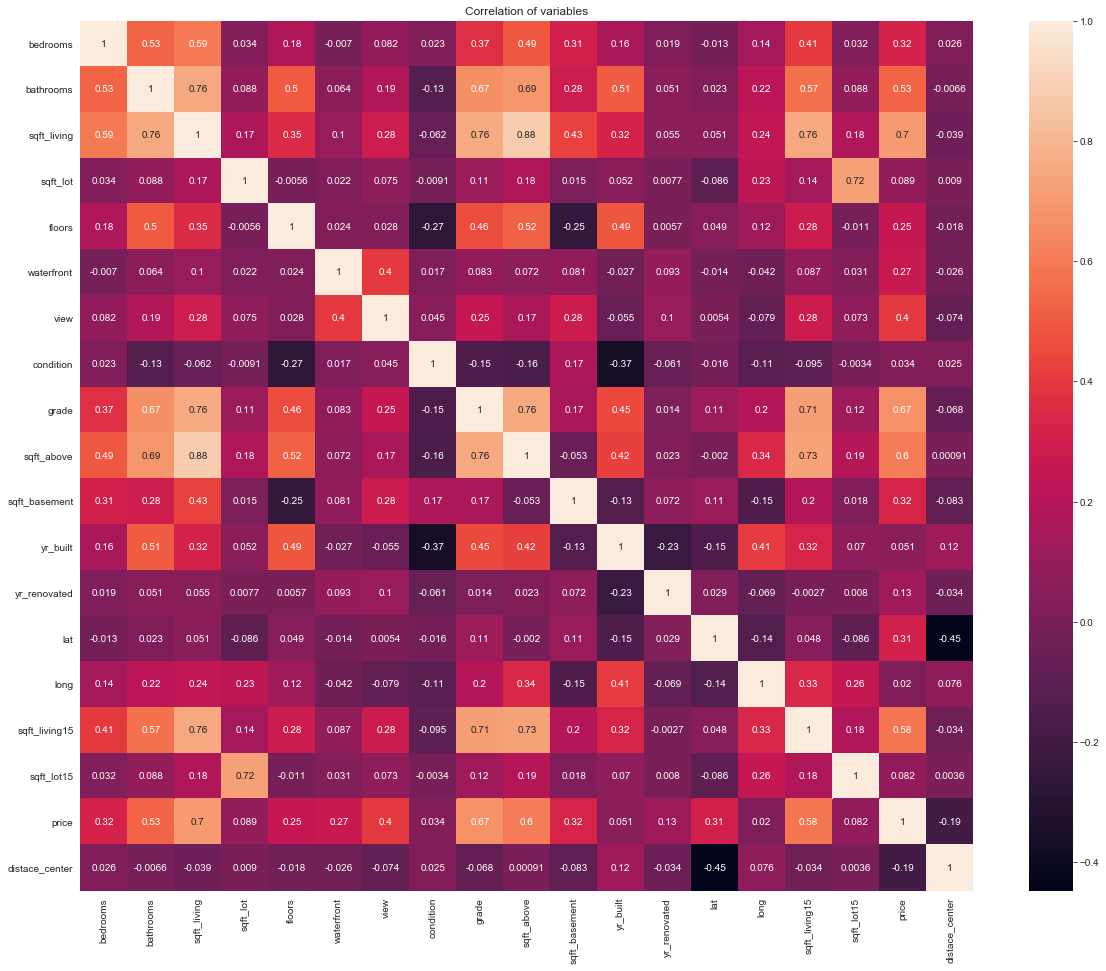

In [275]:
plt.figure(figsize=(20,16))
plt.title('Correlation of variables')
sns.heatmap(df4.select_dtypes('number').corr(),vmax=1.0,  annot=True)
plt.show()

In [448]:
y=df3['price']
X=pd.concat([num4,categorical],axis=1)
#X.drop(columns=['index'],inplace=True)

In [449]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [450]:
linear3=m_func(X_train, X_test, y_train, y_test)

MAE: 95348.81
MSE: 25806130485.27
RMSE: 160642.87
R2: 0.81
Adjusted R2: 0.80
Relative error: 0.19


In [451]:
df5=df4.copy()

## Test 3


### The distances to the economic hubs Downtown Seattle & Bellevue:

In [452]:
#location of the 2 city centers
bellevue = tuple([47.61555, -122.20392])
Seattle = tuple([47.6050 , -122.3344])

In [453]:
df5['location']=df3['location']

In [454]:
#df5.drop(columns=['lat','long'],inplace=True)

In [455]:
df5['distance_bell']=list(map(lambda a:haversine(a,bellevue, Unit.KILOMETERS),df5['location']))

In [456]:
df5['distance_seat']=list(map(lambda a:haversine(a,Seattle, Unit.KILOMETERS),df5['location']))

In [457]:
# the center which has the min distance to the house
df5['dist_hub']=df5[['distance_seat', 'distance_bell']].min(axis=1)

In [458]:
df5.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,price,city,distace_center,location,distance_bell,distance_seat,dist_hub
0,4,1.0,1450,8800,1.0,0,0,4,7,1450,0,1954,0,47.5746,-122.135,1260,8942,435000,Bellevue,6.171973,"(47.5746, -122.135)",6.887852,15.331050,6.887852
1,4,2.5,3310,6500,2.0,0,0,3,8,3310,0,2012,0,47.5150,-121.870,2380,5000,555000,Snoqualmie,3.575997,"(47.515, -121.87)",27.435202,36.255395,27.435202
2,4,2.5,1940,10500,1.0,0,0,4,7,1140,800,1976,0,47.6830,-122.114,2200,10500,550000,Redmond,1.681958,"(47.683, -122.11399999999999)",10.080783,18.650836,10.080783
3,2,2.5,1630,1368,2.0,0,0,3,7,1280,350,2009,0,47.5489,-122.363,1590,2306,295000,Seattle,6.588964,"(47.5489, -122.363)",14.046038,6.596643,6.596643
4,3,2.5,2600,4750,1.0,0,0,4,9,1700,900,1951,0,47.6833,-122.400,2380,4750,790000,Seattle,10.273018,"(47.6833, -122.4)",16.507286,9.997825,9.997825


In [459]:
num5=df5.select_dtypes('number')
num5.drop(columns=['price','distance_bell','distance_seat'],inplace=True)

In [460]:
y=df3['price']
X=pd.concat([num5,categorical],axis=1)

In [461]:
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,distace_center,dist_hub,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,city_Bellevue,city_Black Diamond,city_Bothell,city_Carnation,city_Duvall,city_Enumclaw,city_Fall City,city_Federal Way,city_Issaquah,city_Kenmore,city_Kent,city_Kirkland,city_Maple Valley,city_Medina,city_Mercer Island,city_North Bend,city_Redmond,city_Renton,city_Sammamish,city_Seattle,city_Snoqualmie,city_Vashon,city_Woodinville
0,4,1.0,1450,8800,1.0,0,0,4,7,1450,0,1954,0,47.5746,-122.135,1260,8942,6.171973,6.887852,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4,2.5,3310,6500,2.0,0,0,3,8,3310,0,2012,0,47.5150,-121.870,2380,5000,3.575997,27.435202,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,4,2.5,1940,10500,1.0,0,0,4,7,1140,800,1976,0,47.6830,-122.114,2200,10500,1.681958,10.080783,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,2,2.5,1630,1368,2.0,0,0,3,7,1280,350,2009,0,47.5489,-122.363,1590,2306,6.588964,6.596643,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,3,2.5,2600,4750,1.0,0,0,4,9,1700,900,1951,0,47.6833,-122.400,2380,4750,10.273018,9.997825,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [462]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [463]:
linear4=m_func(X_train, X_test, y_train, y_test)

MAE: 95088.91
MSE: 25789462787.61
RMSE: 160590.98
R2: 0.81
Adjusted R2: 0.80
Relative error: 0.19


## Test 4


### bins of the bathroom
we will make 3 bins

In [464]:
df6=df5.copy()

In [465]:
df6

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,price,city,distace_center,location,distance_bell,distance_seat,dist_hub
0,4,1.00,1450,8800,1.0,0,0,4,7,1450,0,1954,0,47.5746,-122.135,1260,8942,435000,Bellevue,6.171973,"(47.5746, -122.135)",6.887852,15.331050,6.887852
1,4,2.50,3310,6500,2.0,0,0,3,8,3310,0,2012,0,47.5150,-121.870,2380,5000,555000,Snoqualmie,3.575997,"(47.515, -121.87)",27.435202,36.255395,27.435202
2,4,2.50,1940,10500,1.0,0,0,4,7,1140,800,1976,0,47.6830,-122.114,2200,10500,550000,Redmond,1.681958,"(47.683, -122.11399999999999)",10.080783,18.650836,10.080783
3,2,2.50,1630,1368,2.0,0,0,3,7,1280,350,2009,0,47.5489,-122.363,1590,2306,295000,Seattle,6.588964,"(47.5489, -122.363)",14.046038,6.596643,6.596643
4,3,2.50,2600,4750,1.0,0,0,4,9,1700,900,1951,0,47.6833,-122.400,2380,4750,790000,Seattle,10.273018,"(47.6833, -122.4)",16.507286,9.997825,9.997825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21415,4,1.75,1980,5850,1.0,0,1,4,8,1380,600,1960,0,47.5607,-122.391,1810,5850,725000,Seattle,6.625156,"(47.5607, -122.391)",15.298590,6.502822,6.502822
21416,3,2.00,1410,44866,1.0,0,0,4,7,1410,0,1985,0,47.3273,-122.370,2950,29152,335000,Federal Way,2.776388,"(47.3273, -122.37)",34.397032,30.994615,30.994615
21417,5,2.00,1870,7344,1.5,0,0,3,7,1870,0,1960,0,47.5951,-122.144,1870,7650,450000,Bellevue,4.212964,"(47.5951, -122.14399999999999)",5.035025,14.318385,5.035025
21418,2,1.75,1390,6670,1.0,0,0,3,6,720,670,1941,0,47.6914,-122.308,920,6380,445500,Seattle,9.876384,"(47.6914, -122.30799999999999)",11.485208,9.808687,9.808687


In [466]:
def bathroom(x):
    if x <= 1:
        return '1 or less'
    elif (x > 1) & (x < 3):
        return'2 or 2+'
    else:
        return '3 or more'
    

In [467]:
df6['bathrooms']=list(map(bathroom,df6['bathrooms']))

In [468]:
df6['bathrooms'].unique()

array(['1 or less', '2 or 2+', '3 or more'], dtype=object)

In [469]:
#dummises
cat1=df6['bathrooms']
categorical2 = pd.get_dummies(df6['bathrooms'], columns=list(df6['bathrooms']),drop_first=True)
categorical2.head()


,2 or 2+,3 or more
0,0,0
1,1,0
2,1,0
3,1,0
4,1,0


In [470]:
num6=df6.select_dtypes('number')

In [471]:
cat1 =pd.concat([categorical,categorical2],axis=1)

In [472]:
y=df6['price']
X=pd.concat([num6,cat1],axis=1)
X.drop(columns='price',inplace=True)
X

,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,distace_center,distance_bell,distance_seat,dist_hub,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,city_Bellevue,city_Black Diamond,city_Bothell,city_Carnation,city_Duvall,city_Enumclaw,city_Fall City,city_Federal Way,city_Issaquah,city_Kenmore,city_Kent,city_Kirkland,city_Maple Valley,city_Medina,city_Mercer Island,city_North Bend,city_Redmond,city_Renton,city_Sammamish,city_Seattle,city_Snoqualmie,city_Vashon,city_Woodinville,2 or 2+,3 or more
0,4,1450,8800,1.0,0,0,4,7,1450,0,1954,0,47.5746,-122.135,1260,8942,6.171973,6.887852,15.331050,6.887852,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4,3310,6500,2.0,0,0,3,8,3310,0,2012,0,47.5150,-121.870,2380,5000,3.575997,27.435202,36.255395,27.435202,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,4,1940,10500,1.0,0,0,4,7,1140,800,1976,0,47.6830,-122.114,2200,10500,1.681958,10.080783,18.650836,10.080783,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
3,2,1630,1368,2.0,0,0,3,7,1280,350,2009,0,47.5489,-122.363,1590,2306,6.588964,14.046038,6.596643,6.596643,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,3,2600,4750,1.0,0,0,4,9,1700,900,1951,0,47.6833,-122.400,2380,4750,10.273018,16.507286,9.997825,9.997825,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21415,4,1980,5850,1.0,0,1,4,8,1380,600,1960,0,47.5607,-122.391,1810,5850,6.625156,15.298590,6.502822,6.502822,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
21416,3,1410,44866,1.0,0,0,4,7,1410,0,1985,0,47.3273,-122.370,2950,29152,2.776388,34.397032,30.994615,30.994615,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [473]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [474]:
linear4=m_func(X_train, X_test, y_train, y_test)

MAE: 94942.19
MSE: 27193764230.25
RMSE: 164905.32
R2: 0.81
Adjusted R2: 0.80
Relative error: 0.19


In [475]:
df7=df6.copy()


In [476]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21419 entries, 0 to 21419
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bedrooms        21419 non-null  int64  
 1   bathrooms       21419 non-null  object 
 2   sqft_living     21419 non-null  int64  
 3   sqft_lot        21419 non-null  int64  
 4   floors          21419 non-null  float64
 5   waterfront      21419 non-null  int64  
 6   view            21419 non-null  int64  
 7   condition       21419 non-null  int64  
 8   grade           21419 non-null  int64  
 9   sqft_above      21419 non-null  int64  
 10  sqft_basement   21419 non-null  int64  
 11  yr_built        21419 non-null  int64  
 12  yr_renovated    21419 non-null  int64  
 13  lat             21419 non-null  float64
 14  long            21419 non-null  float64
 15  sqft_living15   21419 non-null  int64  
 16  sqft_lot15      21419 non-null  int64  
 17  price           21419 non-null 

## Test 5

### Bins of the bedroom
will make 4 bins


In [477]:
def bedroom(x):
    if (x == 2) or (x == 1):
        return '1 or 2'
    elif x==3:
        return'2 rooms'
    elif x==4:
        return '4 rooms'
    else:
        return '5 or more'

In [478]:
df7['bedrooms']=list(map(bedroom,df7['bedrooms']))

In [479]:
df7['bedrooms'].value_counts()

2 rooms      9731
4 rooms      6849
1 or 2       2927
5 or more    1912
Name: bedrooms, dtype: int64

In [480]:
df7['bedrooms']=df7['bedrooms'].astype('object')

In [481]:
cat=df7['bedrooms']
categorical3 = pd.get_dummies(df7['bedrooms'], columns=list(df7['bedrooms']),drop_first=True)
categorical3.head()


,2 rooms,4 rooms,5 or more
0,0,1,0
1,0,1,0
2,0,1,0
3,0,0,0
4,1,0,0


In [482]:
num7=df7.select_dtypes('number')

In [483]:
cat2=pd.concat([cat1,categorical3],axis=1)

In [484]:
y=df7['price']
X=pd.concat([num7,cat2],axis=1)
X.drop(columns='price',inplace=True)
X

,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,distace_center,distance_bell,distance_seat,dist_hub,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,city_Bellevue,city_Black Diamond,city_Bothell,city_Carnation,city_Duvall,city_Enumclaw,city_Fall City,city_Federal Way,city_Issaquah,city_Kenmore,city_Kent,city_Kirkland,city_Maple Valley,city_Medina,city_Mercer Island,city_North Bend,city_Redmond,city_Renton,city_Sammamish,city_Seattle,city_Snoqualmie,city_Vashon,city_Woodinville,2 or 2+,3 or more,2 rooms,4 rooms,5 or more
0,1450,8800,1.0,0,0,4,7,1450,0,1954,0,47.5746,-122.135,1260,8942,6.171973,6.887852,15.331050,6.887852,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,3310,6500,2.0,0,0,3,8,3310,0,2012,0,47.5150,-121.870,2380,5000,3.575997,27.435202,36.255395,27.435202,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
2,1940,10500,1.0,0,0,4,7,1140,800,1976,0,47.6830,-122.114,2200,10500,1.681958,10.080783,18.650836,10.080783,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
3,1630,1368,2.0,0,0,3,7,1280,350,2009,0,47.5489,-122.363,1590,2306,6.588964,14.046038,6.596643,6.596643,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,2600,4750,1.0,0,0,4,9,1700,900,1951,0,47.6833,-122.400,2380,4750,10.273018,16.507286,9.997825,9.997825,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21415,1980,5850,1.0,0,1,4,8,1380,600,1960,0,47.5607,-122.391,1810,5850,6.625156,15.298590,6.502822,6.502822,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
21416,1410,44866,1.0,0,0,4,7,1410,0,1985,0,47.3273,-122.370,2950,29152,2.776388,34.397032,30.994615,30.994615,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [485]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [486]:
linear5=m_func(X_train, X_test, y_train, y_test)

MAE: 94891.55
MSE: 27180497614.07
RMSE: 164865.09
R2: 0.81
Adjusted R2: 0.80
Relative error: 0.19


### Dummy : Grade (ordinal)

In [487]:

categorical4 = pd.get_dummies(df7['grade'], columns=list(df7['grade']),drop_first=True)
categorical4.head()

,4,5,6,7,8,9,10,11,12,13
0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0


In [488]:
cat3=pd.concat([cat2,categorical4],axis=1)

In [489]:
X=pd.concat([X,cat3],axis=1)
X.drop(columns='grade',inplace=True)
X

,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,distace_center,distance_bell,distance_seat,dist_hub,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,city_Bellevue,city_Black Diamond,city_Bothell,city_Carnation,city_Duvall,city_Enumclaw,city_Fall City,city_Federal Way,city_Issaquah,city_Kenmore,city_Kent,city_Kirkland,city_Maple Valley,city_Medina,city_Mercer Island,city_North Bend,city_Redmond,city_Renton,city_Sammamish,city_Seattle,city_Snoqualmie,city_Vashon,city_Woodinville,2 or 2+,3 or more,2 rooms,4 rooms,5 or more,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,city_Bellevue,city_Black Diamond,city_Bothell,city_Carnation,city_Duvall,city_Enumclaw,city_Fall City,city_Federal Way,city_Issaquah,city_Kenmore,city_Kent,city_Kirkland,city_Maple Valley,city_Medina,city_Mercer Island,city_North Bend,city_Redmond,city_Renton,city_Sammamish,city_Seattle,city_Snoqualmie,city_Vashon,city_Woodinville,2 or 2+,3 or more,2 rooms,4 rooms,5 or more,4,5,6,7,8,9,10,11,12,13
0,1450,8800,1.0,0,0,4,1450,0,1954,0,47.5746,-122.135,1260,8942,6.171973,6.887852,15.331050,6.887852,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
1,3310,6500,2.0,0,0,3,3310,0,2012,0,47.5150,-121.870,2380,5000,3.575997,27.435202,36.255395,27.435202,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0
2,1940,10500,1.0,0,0,4,1140,800,1976,0,47.6830,-122.114,2200,10500,1.681958,10.08078

In [490]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [491]:
linear6=m_func(X_train, X_test, y_train, y_test)

MAE: 87896.66
MSE: 22230417451.19
RMSE: 149098.68
R2: 0.84
Adjusted R2: 0.83
Relative error: 0.17


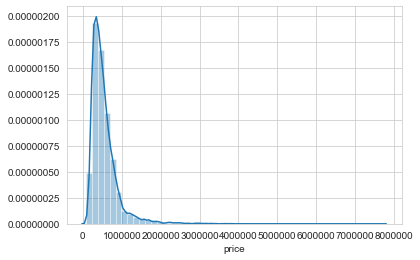

In [492]:
sns.distplot(df7['price'])
plt.show()

### log Y

In [493]:
y_log=pd.DataFrame(np.log(df7['price']))

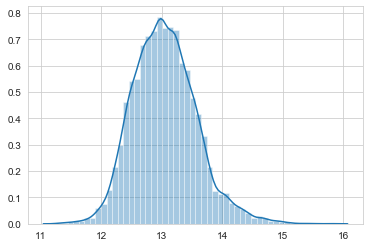

In [494]:
sns.distplot(y_log)
plt.show()

In [495]:
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

In [496]:
linear7=m_func(X_train, X_test, y_train, y_test)

MAE:   0.13
MSE:   0.03
RMSE:   0.18
R2: 0.89
Adjusted R2: 0.88
Relative error: 0.01


In [348]:
df8['price_log']=y_log

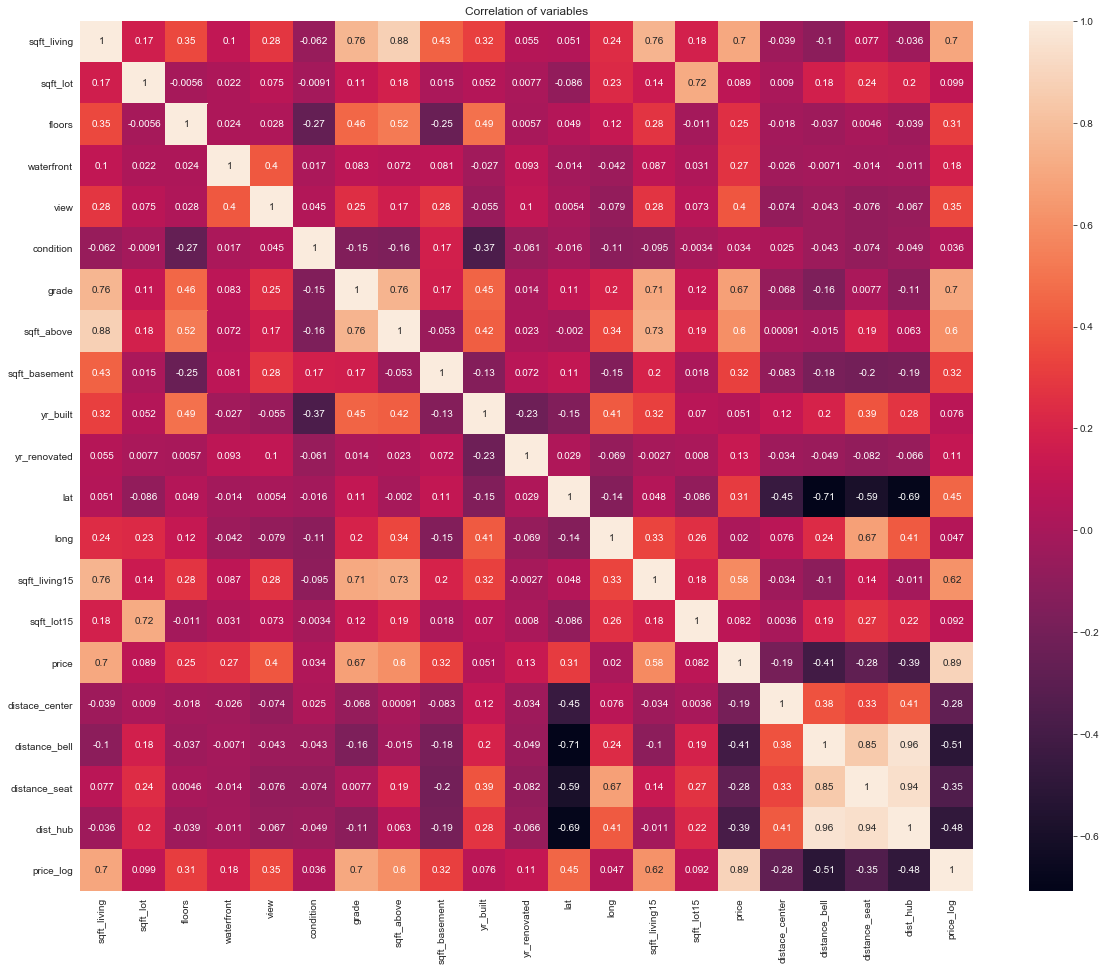

In [349]:
plt.figure(figsize=(20,16))
plt.title('Correlation of variables')
sns.heatmap(df8.select_dtypes('number').corr(),vmax=1.0,  annot=True)
plt.show()

##### dropping low correlated columns

In [497]:
xx=X.copy()
#xx.drop(columns=['sqft_lot15','yr_built','yr_renovated'])

In [498]:
xx

,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,distace_center,distance_bell,distance_seat,dist_hub,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,city_Bellevue,city_Black Diamond,city_Bothell,city_Carnation,city_Duvall,city_Enumclaw,city_Fall City,city_Federal Way,city_Issaquah,city_Kenmore,city_Kent,city_Kirkland,city_Maple Valley,city_Medina,city_Mercer Island,city_North Bend,city_Redmond,city_Renton,city_Sammamish,city_Seattle,city_Snoqualmie,city_Vashon,city_Woodinville,2 or 2+,3 or more,2 rooms,4 rooms,5 or more,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,city_Bellevue,city_Black Diamond,city_Bothell,city_Carnation,city_Duvall,city_Enumclaw,city_Fall City,city_Federal Way,city_Issaquah,city_Kenmore,city_Kent,city_Kirkland,city_Maple Valley,city_Medina,city_Mercer Island,city_North Bend,city_Redmond,city_Renton,city_Sammamish,city_Seattle,city_Snoqualmie,city_Vashon,city_Woodinville,2 or 2+,3 or more,2 rooms,4 rooms,5 or more,4,5,6,7,8,9,10,11,12,13
0,1450,8800,1.0,0,0,4,1450,0,1954,0,47.5746,-122.135,1260,8942,6.171973,6.887852,15.331050,6.887852,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
1,3310,6500,2.0,0,0,3,3310,0,2012,0,47.5150,-121.870,2380,5000,3.575997,27.435202,36.255395,27.435202,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0
2,1940,10500,1.0,0,0,4,1140,800,1976,0,47.6830,-122.114,2200,10500,1.681958,10.08078

In [499]:
X_train, X_test, y_train, y_test = train_test_split(xx, y, test_size=0.3, random_state=42)

In [500]:
linear9=m_func(X_train, X_test, y_train, y_test)

MAE: 87897.92
MSE: 21590040656.02
RMSE: 146935.50
R2: 0.84
Adjusted R2: 0.83
Relative error: 0.17


### Results with log Y

MAE:   0.13

MSE:   0.03

RMSE:   0.18

R2: 0.89

Adjusted R2: 0.88

Relative error: 0.01



# Results with normal Y



MAE: 87897.92

MSE: 21590040656.02

RMSE: 146935.50

R2: 0.84

Adjusted R2: 0.83

Relative error: 0.17